In [1]:
import json

f = open('4-bash_files_list_sc.json')

data = json.load(f)

In [2]:
bash_files_list = data["bash_files"]
print(len(bash_files_list))

6785


In [3]:
errors = []
for bash_file in bash_files_list:
    errors += bash_file["shellcheck_errors"]

In [4]:
print(len(errors))

68272


In [5]:
import numpy as np

In [6]:
error_set = set(errors)
print(len(error_set))

239


In [7]:
unique_errors, occurrences = np.unique(errors, return_counts=True)

In [23]:
top_idx = np.argsort(occurrences)[::-1][:50]
top_errors = [unique_errors[i] for i in top_idx]
top_occurrences = [occurrences[i] for i in top_idx]

In [24]:
print(top_errors)
print(top_occurrences)

['SC2086', 'SC2006', 'SC2268', 'SC2164', 'SC2046', 'SC2034', 'SC2155', 'SC2181', 'SC2148', 'SC1090', 'SC2016', 'SC2004', 'SC2162', 'SC2236', 'SC2068', 'SC2002', 'SC2166', 'SC2035', 'SC2015', 'SC2121', 'SC2128', 'SC2009', 'SC1083', 'SC1017', 'SC2048', 'SC2001', 'SC2003', 'SC2269', 'SC2060', 'SC2126', 'SC2103', 'SC2031', 'SC2145', 'SC2043', 'SC2027', 'SC2206', 'SC3010', 'SC2059', 'SC2129', 'SC2005', 'SC2124', 'SC2012', 'SC3014', 'SC2219', 'SC2010', 'SC2207', 'SC2196', 'SC2013', 'SC2242', 'SC2231']
[34813, 9405, 2992, 2253, 1940, 1896, 1150, 1142, 879, 540, 469, 452, 414, 405, 394, 336, 330, 300, 294, 290, 240, 236, 235, 231, 225, 220, 211, 209, 196, 176, 173, 164, 159, 154, 145, 143, 140, 138, 132, 119, 112, 111, 107, 107, 101, 99, 93, 91, 90, 81]


In [15]:
num_lines_list = []
num_stars_list = []
num_errorperline_list = []
num_sc_list = []
for bash_file in bash_files_list:
    if int(bash_file["num_lines"]) == 0:
        continue
    num_lines_list.append(int(bash_file["num_lines"]))
    num_stars_list.append(int(bash_file["stars"]))
    num_sc_list.append(len(bash_file["shellcheck_errors"]))
    num_errorperline_list.append(float(len(bash_file["shellcheck_errors"]))/float(bash_file["num_lines"]))


Text(0.5, 1.0, 'Stars vs Errors per Line')

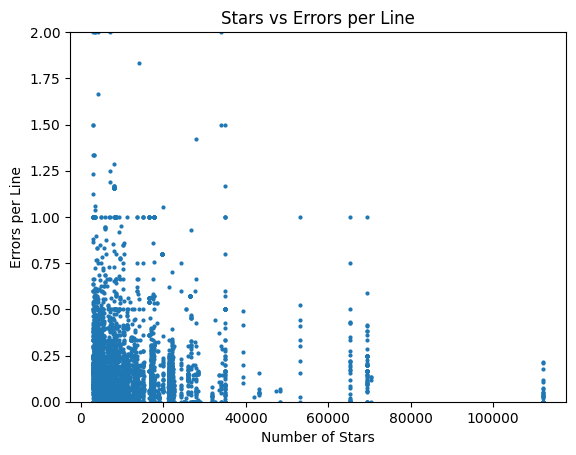

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(num_stars_list, num_errorperline_list, s=4)
plt.ylim(ymin=0, ymax = 2)
plt.xlabel("Number of Stars")
plt.ylabel("Errors per Line")
plt.title("Stars vs Errors per Line")